<font color='IndianRed'>
<font size=9> 

**Curso Inferencia Estadística**

<font color = 'DodgerBlue'>
<font size = 5>
    
**Ajuste de distribuciones**

<font color = 'Black'>
<font size = 3>

El **ajuste de distribuciones** se refiere a aplicar una o varias técnicas gráficas y analíticas para tener una idea aproximada sobre el tipo de variable aleatoria al que pertencen tus datos.

Por ejemplo, si tus datos son de tipo discreto (como el año de nacimiento o el número de delitos cometidos mes a mes), entonces vale la pena preguntarse si tus datos provienen de una distribución de **Bernoulli**, **binomial**, **poisson**, **geométrica**, etc.

Y si tus datos son de tipo continuo (como la velocidad de crecimiento de una población o el tiempo de espera entre la llegada de dos clientes a un restaurante), entonces nos preguntamos si los datos provienen de una **gaussiana**, una **exponencial**, una **uniforme**, etc.

<font color = 'LightSeaGreen'>
<font size = 3>

**Ejemplo.**

Supongamos que tienes los datos del dataframe [ejemplo01](https://github.com/scidatmath2020/Inferencia_Estadistica_2024/blob/main/data/ejemplo_01.csv).

Digamos que esos datos provienen de una variable aleatoria $X$. Es decir, tomamos una muestra de tamaño 100 de cierta población de estudio y hemos tomado la medida de cierta característica $X$ de esa población.

Mostramos el histograma junto con la densidad de esta muestra. A la densidad mostrada se le conoce como **densidad empírica.**

<img src="Img/im012.png">

---

<font color = 'DodgerBlue'>
<font size = 5>
    
**Histograma**

<font color = 'Black'>
<font size = 3>

El **histograma** básicamente es la gráfica de las tablas de frecuencia que se vieron en las primeras clases.

- Lo que hace el **histograma** es dividir todos los valores de la columna "valor" y pone la cantidad de valores que caen el cada división.

---

<font color = 'deepskyblue'>
<font size = 5>

Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import * # para usar ggplot
import os

<font color = 'deepskyblue'>
<font size = 5>
    
Lectura de los datos

In [2]:
# Obtenemos la ruta del notebook
os.getcwd() 

'/home/zick13/Documentos/Developer/Courses/Inferencia_Estadistica/Clases/06_Ajuste_distribuciones_y_simulaciones'

In [3]:
# ejemplo 01
ejemplo_01 = pd.read_csv('/home/zick13/Documentos/Developer/Courses/Inferencia_Estadistica/Clases/06_Ajuste_distribuciones_y_simulaciones/Data/ejemplo_01.csv')

# Se muestra el dataframe para ver si cargó de manera exitosa
ejemplo_01

,Unnamed: 0,valor
0,1,0.758667
1,2,0.370666
2,3,1.689090
3,4,2.680425
4,5,1.039670
...,...,...
95,96,1.075529
96,97,1.534832
97,98,0.722337
98,99,1.915894


In [4]:
# Imprimimos las primeras 5 filas del data set para verificar si cargaron exitosamente
ejemplo_01.head()

,Unnamed: 0,valor
0,1,0.758667
1,2,0.370666
2,3,1.689090
3,4,2.680425
4,5,1.039670


In [5]:
# Imprimimos las últimas 5 filas del data set para verificar si cargaron exitosamente
ejemplo_01.tail()

,Unnamed: 0,valor
95,96,1.075529
96,97,1.534832
97,98,0.722337
98,99,1.915894
99,100,0.203703


In [6]:
# Imprimimos las dimensiones del data set
ejemplo_01.shape

(100, 2)

In [7]:
# Muestra el nombre de las columnas
ejemplo_01.columns

Index(['Unnamed: 0', 'valor'], dtype='object')

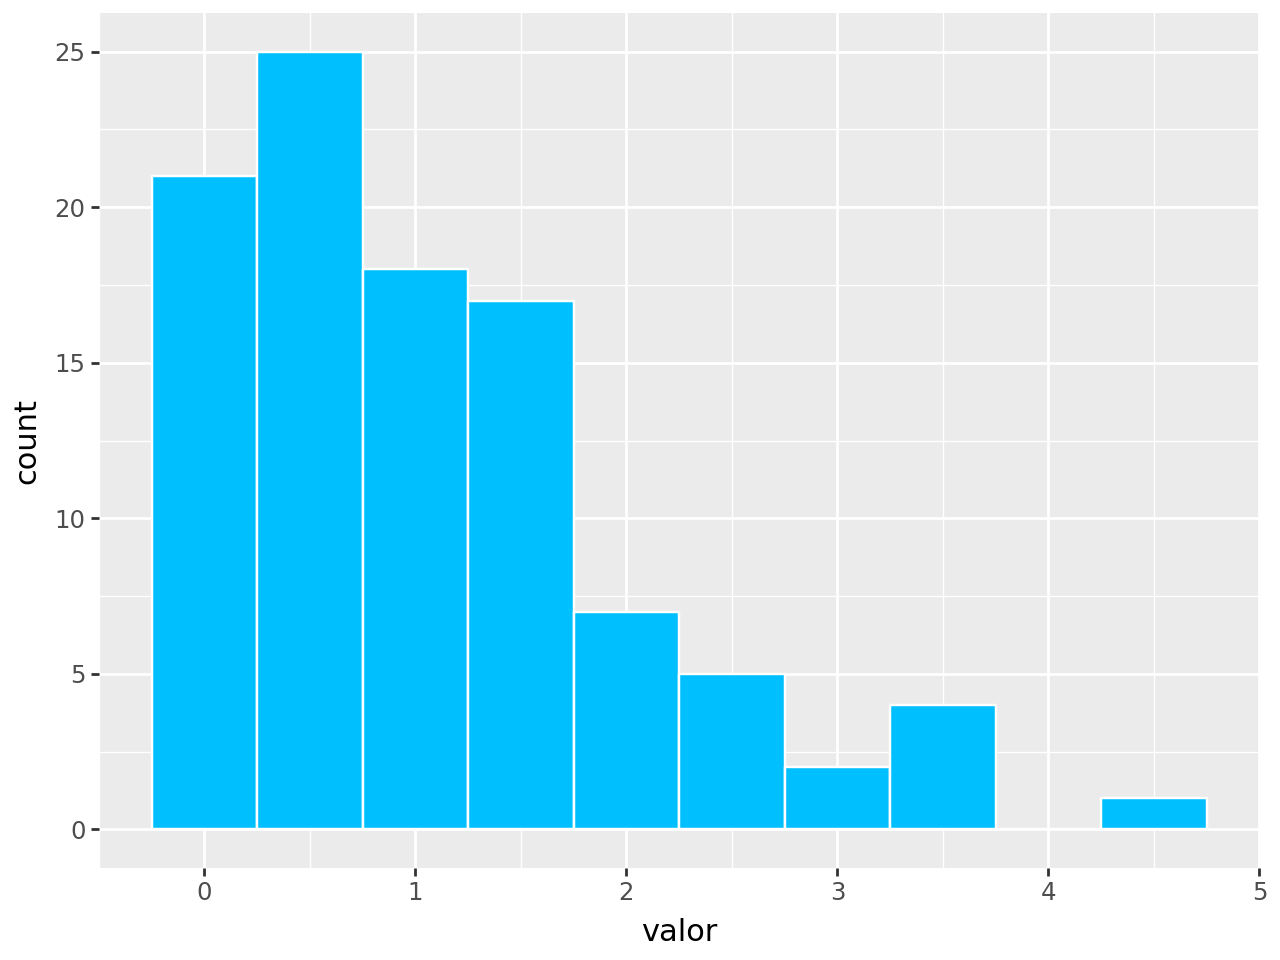

In [8]:
# Creamos un histograma
(
    ggplot(data = ejemplo_01) +
    geom_histogram(mapping = aes(x = "valor"), fill = "deepskyblue", color = "white", binwidth = 0.5)
)

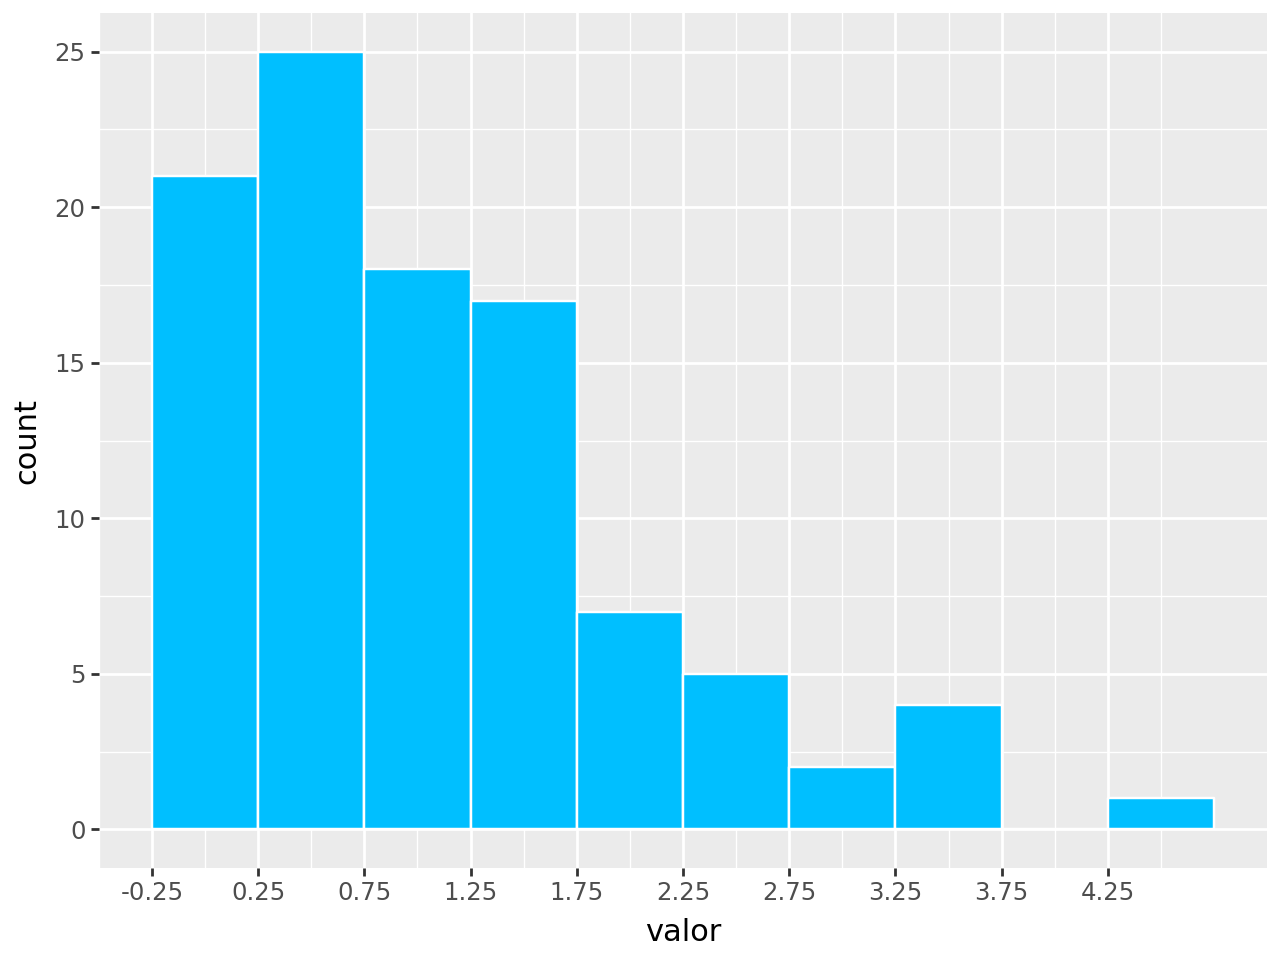

In [9]:
# Creamos un histograma pero ahora con los con los ticks o brincos en el eje x
(
    ggplot(data = ejemplo_01) +
    geom_histogram(mapping = aes(x = "valor"), fill = "deepskyblue", color = "white", binwidth = 0.5) +
    scale_x_continuous(breaks = [x * 0.5 - 0.25 for x in range(-1, 10)])
)

<font color = 'LightSeaGreen'>
<font size = 3>

**Ejemplo.**

<font color = 'LightSeaGreen'>
<font size = 3>

Uno bien puede preguntarse, ¿cuál es la probabilidad de que el valor de la característica $X$ de un individuo tomado al azar sea menor a 2.25?

O en otras palabras, **¿qué porcentaje de los individuos de la población cumplen que el valor de su característica $X$ es menor que 2.25?**

Supongamos que la característica $X$ es la velocidad de un individuo. Lo que nos están preguntando es qué porcentaje de la población cumple que su velocidad $X$ es menor que 2.25

Por lo tanto me están preguntando $P(X < 2.25) = F(2.25)$.

Para responder la pregunta, según el histograma se tiene lo siguiente: $22 + 25 + 18 + 17 + 6 = 88$. Es decir, el $88\%$ de la población cumple que su velocidad $X$ es menor que $2.25$. 

El detalle es que no sabemos cómo es la distribución para inferir que la población cumple con esa característica.

Sabemos que el histograma nos indica que mida las alturas de cada uno de los primeros 5 rectángulos. Sin embargo, **recuerda que ese histograma únicamente corresponde con una muestra de tamaño 100 de nuestra población**, por lo cual la respuesta dada por este método de medir alturas no tiene por qué ser buena. 

---

<font color = 'Brown'>
<font size = 4>
    
**Notas**

<font color = 'DarkRed'>
<font size = 3>

- Los histogramas de una **distribución gaussiana** se ve como fantasmas o montañas.
- Los histogramas de una **distribución uniforme continua** se ven planos, no como montañas.
- La **exponencial** se ve como una exponencial negativa $e^{-x}$, que va bajando, es como media montaña.
- Las **binomiales** se parecen mucho a las **gaussianas**.

---

<font color = 'Black'>
<font size = 3>

Pero peor aún: **el uso de densidad empírica conlleva un sobreajuste de los datos**. 

Por ejemplo, si los datos realmente provienen de una gaussiana pero tienes varios atípicos, la densidad empírica puede no parecerse a una gaussiana.

Es por ello que necesitamos establecer la verdadera densidad a la que se ajusten casi todas las muestras posibles. Esta densidad es lo que se conoce como **densidad teórica**.

De esta manera, podemos decir que el ajuste de distribuciones son las técnicas estadísticas que permiten, a través de las densidades empíricas, conocer aproximadamente a la **densidad teórica**, que es la densidad verdadera ($F$).

---

<font color = 'DodgerBlue'>
<font size = 5>
    
**Proceso para ajustar distribuciones**

<font color = 'Black'>
<font size = 3>

Básicamente se aplican tres pasos:

1. Observar la forma de los datos (gráficas).

2. Ajustar los datos con los tipos de distribuciones que tu **intuición** te indique basado en el paso anterior (si le ves cara de alguna distribución como gaussiana, exponencial, piso plano, etc).

<img src="Img/distributions.png">

3. Verificar cuál de los modelos se ajustó mejor (de todos los modelos que vas proponiendo).

Ahora bien, es importante tomar en cuenta que **no todos los datos corresponden a una distribución "famosa" o sencilla**. El proceso de ajuste de distribuciones es más un arte que una ciencia. Este proceso depende mucho de la interpretación del investigador así como de su experiencia y **perseverancia** en el sentido de tener que buscar y buscar entre las distribuciones posibles hasta encontrar una que se ajuste al modelo.

Debes entender que las distribuciones de los datos reales pueden tener distribuciones muy raras, por eso es importante saber el significado de cada variable aleatoria y saber qué modela cada una de ellas.

En **Python** contamos con la paquetería ``distfit`` que nos ayudan a realizar ajustes de distribuciones. No siempre tiene la razón perpo si ayuda en parte del trabajo.

---

<font color = 'LightSeaGreen'>
<font size = 3>

**Ejemplo.**

<font color = 'LightSeaGreen'>
<font size = 3>

Consideremos la siguiente tabla para ver cómo trabaja ``distfit``.

<font color = 'deepskyblue'>
<font size = 5>

Librerías

In [10]:
from distfit import distfit

In [11]:
# Importamos la tabla con los datos y la visualizamos
ejemplo_02 = pd.read_csv("Data/ejemplo_02.csv")
ejemplo_02

,Unnamed: 0,valor
0,1,6.120596
1,2,38.332637
2,3,8.380883
3,4,8.567679
4,5,4.488034
...,...,...
995,996,29.729386
996,997,9.510358
997,998,11.825993
998,999,13.654020


In [12]:
# Revisamos los datos para ver que se hayan cargado de manera exitosa y observar qué información tiene
ejemplo_02.head()

,Unnamed: 0,valor
0,1,6.120596
1,2,38.332637
2,3,8.380883
3,4,8.567679
4,5,4.488034


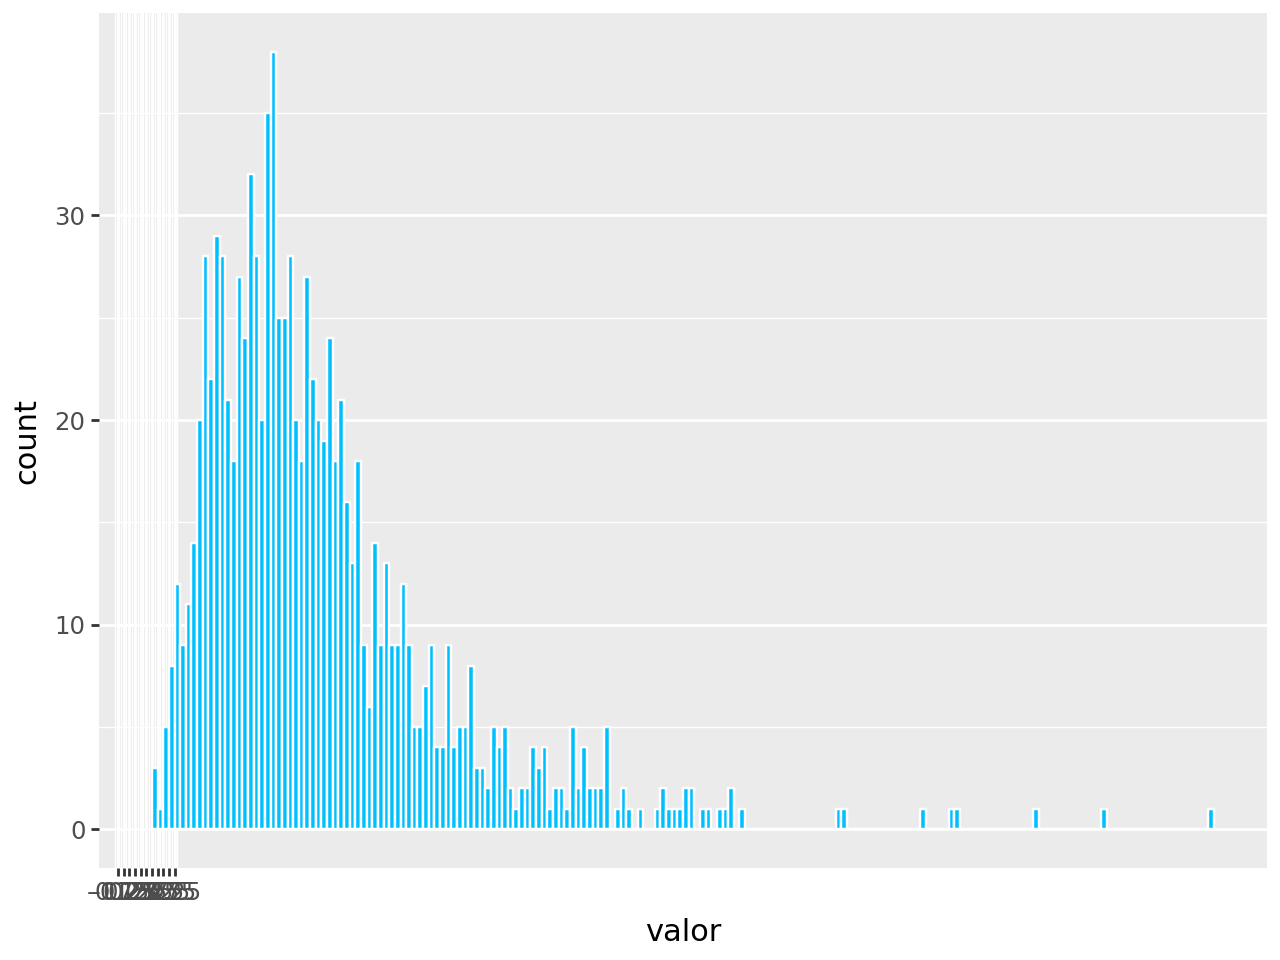

In [13]:
# Obtenemos el histograma de los datos para ver su distribución
(
    ggplot(data = ejemplo_02) +
    geom_histogram(mapping = aes(x = "valor"),
                   binwidth = 0.5,
                   fill = "deepskyblue",
                   color = "white") +
    scale_x_continuous(
breaks=[x * 0.5 - 0.25 for x in range(-1, 10)]
    )
)

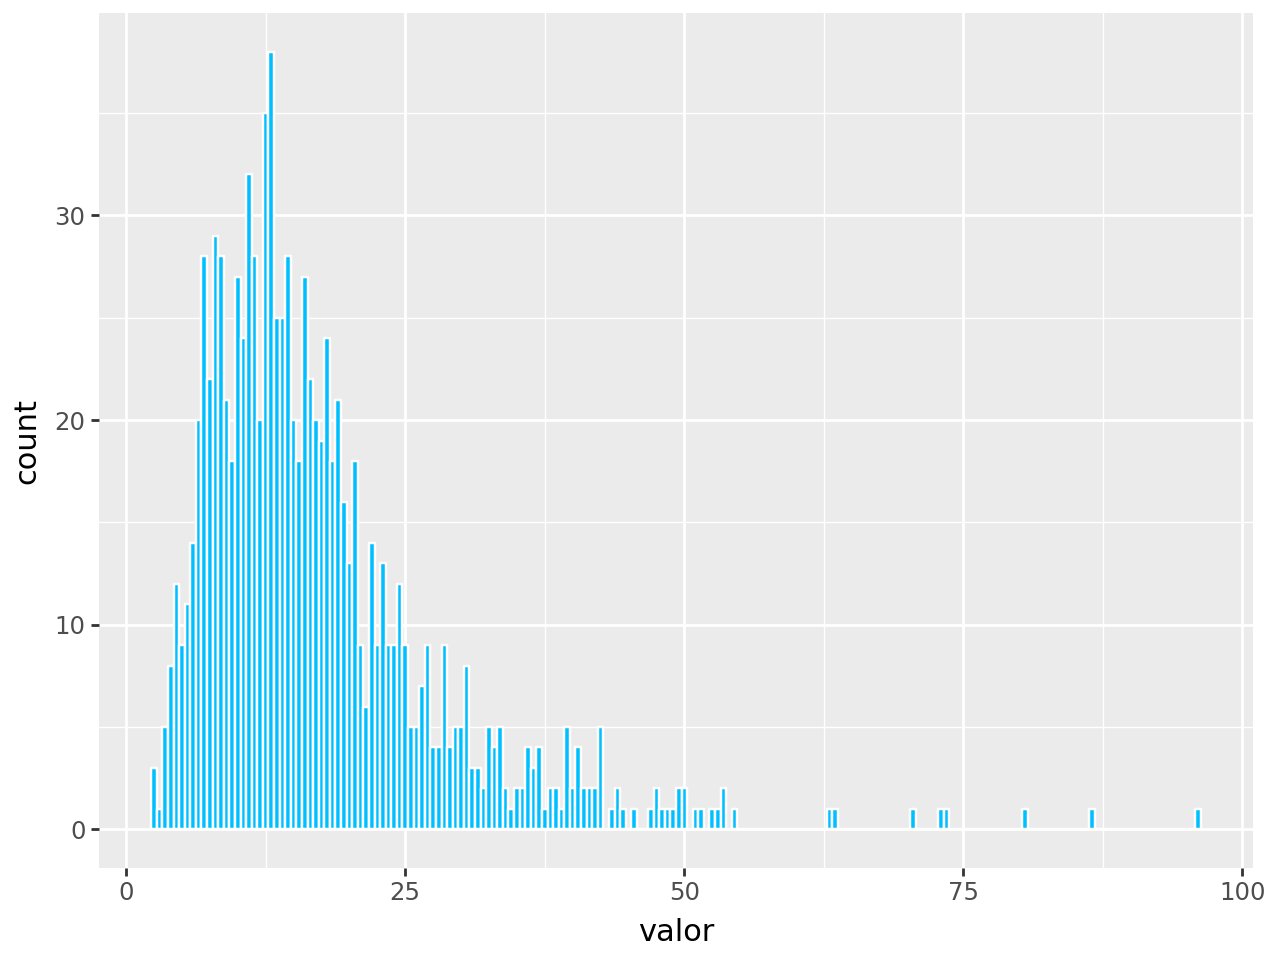

In [14]:
# Obtenemos el histograma mejorado de los datos para ver su distribución
(
    ggplot(data = ejemplo_02) +
    geom_histogram(mapping = aes(x = "valor"),
                   binwidth = 0.5,
                   fill = "deepskyblue",
                   color = "white")
)

<font color = 'LightSeaGreen'>
<font size = 3>

- Observamos que la cola izquierda es más pesada ya que su caída es muy rápida.
- La cola derecha es más ligera ya que tarda más en caer.
- Las gaussianas tienen ambas colas iguales, por tanto esta no es una gaussiana.
- Hay muchas distribuciones por lo que és complicado decidir cuál es la que mejor se ajusta. Por ello vamos a usar ``distfit``.

In [15]:
# Construimos un modelo
modelo_automatico = distfit(todf = True) # un modelo que convierte los resultados en un dataframe

In [16]:
# Ajustamos el modelo y le damos de comer datos
modelo_automatico.fit_transform(ejemplo_02["valor"])

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00286828] [loc=17.302 scale=10.987]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.00507826] [loc=2.393 scale=14.909]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.00507826] [loc=-536870909.607 scale=536870912.000]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 0.00123622] [loc=14.655 scale=7.516]
[distfit] >INFO> [t         ] [0.07 sec] [RSS: 0.0010627] [loc=14.728 scale=6.481]
[distfit] >INFO> [genextreme] [0.05 sec] [RSS: 0.000150596] [loc=12.104 scale=6.421]
[distfit] >INFO> [gamma     ] [0.02 sec] [RSS: 0.000311823] [loc=2.182 scale=6.708]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.000146975] [loc=0.025 scale=14.616]
[distfit] >INFO> [beta      ] [0.05 sec] [RSS: 0.000418812] [loc=2.147 scale=170.313]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0122916] [loc=2.393 scale=93.606]
[distfit] >INFO> [loggamma  ] [0.03 sec] [RSS: 0.00293147] [loc=-3412.402 scale=460.505]
[dis

{'model': {'name': 'lognorm',
  'score': 0.00014697490281438184,
  'loc': 0.024751070552592448,
  'scale': 14.616363291803806,
  'arg': (np.float64(0.5764717905165455),),
  'params': (np.float64(0.5764717905165455),
   0.024751070552592448,
   np.float64(14.616363291803806)),
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f80673dfa30>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': np.float64(5.687616133799033),
  'CII_max_alpha': np.float64(37.75089737493124)},
 'summary':           name     score              loc        scale  \
 0      lognorm  0.000147         0.024751    14.616363   
 1   genextreme  0.000151        12.103688     6.421418   
 2        gamma  0.000312         2.181845      6.70832   
 3         beta  0.000419         2.147241   170.313475   
 4            t  0.001063        14.728374     6.480639   
 5     dweibull  0.001236        14.655017     7.515684   
 6         norm  0.002868        17.301

In [17]:
# Crea un resumen en una tabla de lo que obtuvo
tabla_resultados = modelo_automatico.summary
tabla_resultados

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,lognorm,0.000147,0.024751,14.616363,"(0.5764717905165455,)","(0.5764717905165455, 0.024751070552592448, 14....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,genextreme,0.000151,12.103688,6.421418,"(-0.1977257777337227,)","(-0.1977257777337227, 12.103688405913765, 6.42...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,gamma,0.000312,2.181845,6.70832,"(2.2538816034108464,)","(2.2538816034108464, 2.1818449567957243, 6.708...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#377eb8
3,beta,0.000419,2.147241,170.313475,"(2.131199727781841, 21.63722475067534)","(2.131199727781841, 21.63722475067534, 2.14724...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#4daf4a
4,t,0.001063,14.728374,6.480639,"(2.7204350176117993,)","(2.7204350176117993, 14.728373998485147, 6.480...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#984ea3
5,dweibull,0.001236,14.655017,7.515684,"(1.0139167187496834,)","(1.0139167187496834, 14.65501700651014, 7.5156...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ff7f00
6,norm,0.002868,17.301604,10.986558,(),"(17.301603792606834, 10.986558419900327)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ffff33
7,loggamma,0.002931,-3412.402295,460.505063,"(1716.223131901852,)","(1716.223131901852, -3412.402295153459, 460.50...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#a65628
8,expon,0.005078,2.39297,14.908634,(),"(2.39296965690675, 14.908634135700083)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#f781bf
9,pareto,0.005078,-536870909.60703,536870912.0,"(36010738.41075331,)","(36010738.41075331, -536870909.60703033, 53687...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


[distfit] >INFO> Ploting Summary.


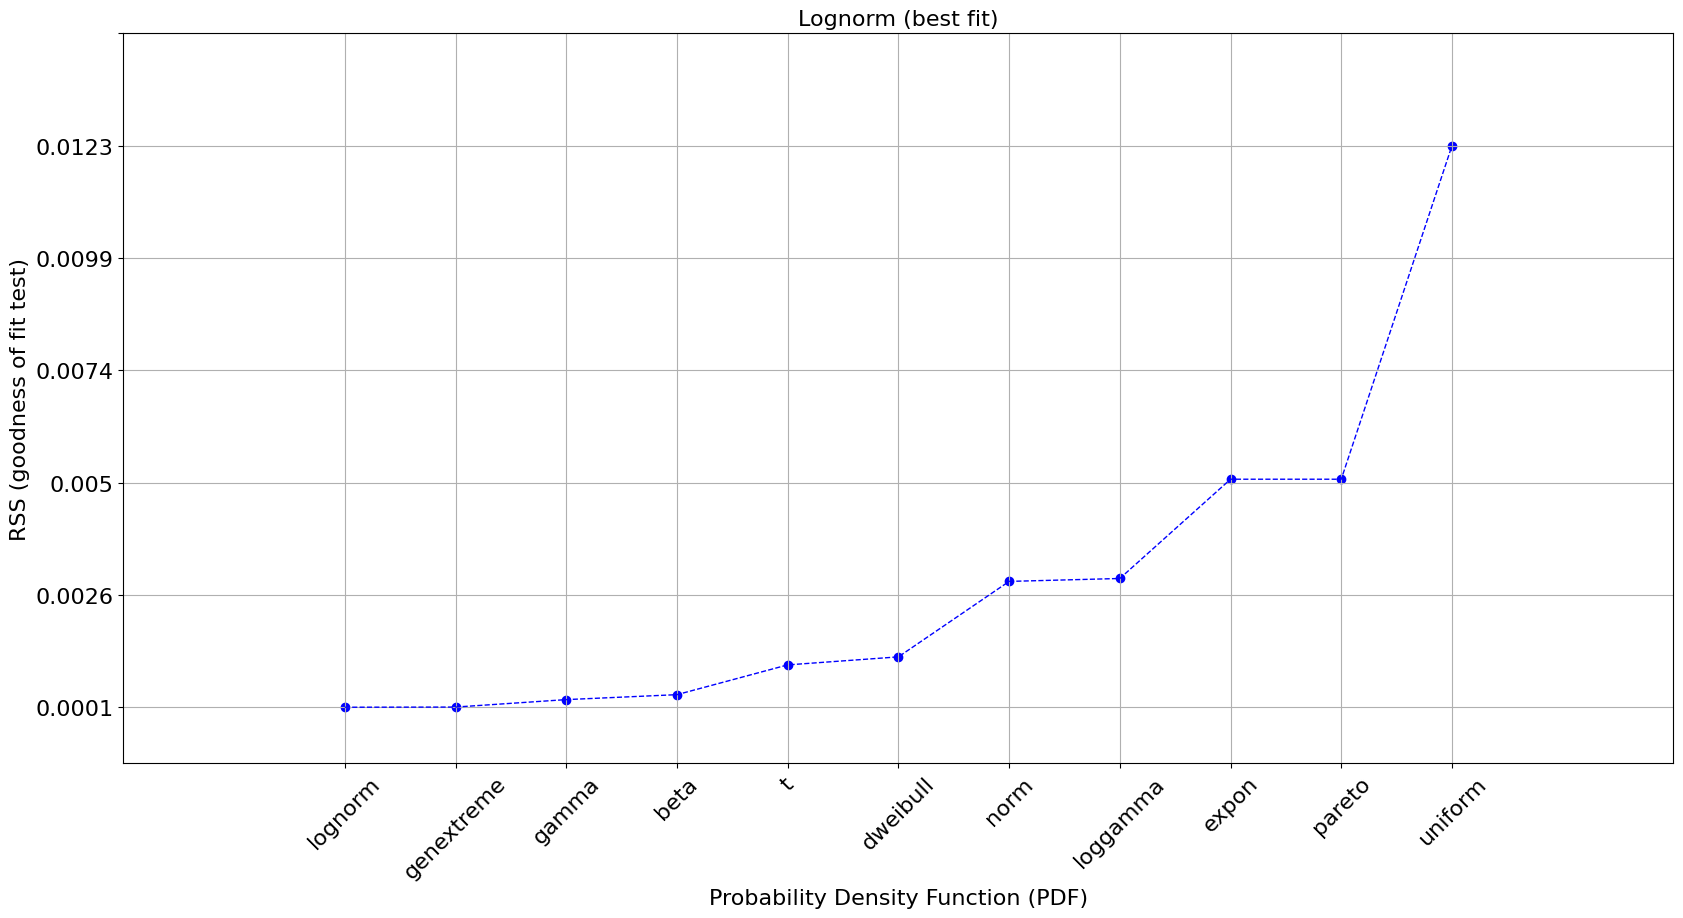

In [18]:
# Se muestra la gráfica con el score para ver qué distribución podemos tomar
modelo_automatico.plot_summary()
plt.show()
%matplotlib inline

<font color = 'LightSeaGreen'>
<font size = 3>

- El *fit_transform*, internamente hace muchos procesos aleatorios, toma muchas muestras de los datos y con ello hace su entrenamiento.
- El **score** viene siendo como en series de tiempo la **informació de Akaike (AIC)**, se busca que el **score** sea muy pequeño.
- Según el resultado nos dice que es una **lognorm**.
- Por lo tanto, $X$ es una **Lognorm** con media $= log(14.61) = 2.68$, y $\sigma = 0.57$.
- Lo feo de Python es que trabaja con el **log** y el **scale**, no trabaja con los parámetros naturales de la distribución, en R si te devuelve el parámetro de la distribución.

**Cualquier cosa por debajo de 0.05 te va a funcionar bien**. 

---

<font color = 'LightSeaGreen'>
<font size = 3>

**Ejemplo.**

<font color = 'LightSeaGreen'>
<font size = 3>

Ahora vamos a generar observaciones gaussianas para ver qué nos dice el ``distfit``, y ver si falla o sigue siendo bueno. 

In [19]:
# Generamos las observaciones gaussianas
observaciones_1 = np.random.normal(loc = 8, scale = 2, size = 2000) # loc es la media y scale es la desviación
observaciones_1

array([ 5.93054864,  7.55251693,  8.43729533, ...,  2.76740422,
       11.61896237,  3.83506472])

In [20]:
# Para hacer el histograma en ggplot ocupamos que estén como en una tabla
mi_tabla1 = pd.DataFrame({"valor": observaciones_1})
mi_tabla1

,valor
0,5.930549
1,7.552517
2,8.437295
3,7.114145
4,4.567864
...,...
1995,10.224022
1996,5.921079
1997,2.767404
1998,11.618962


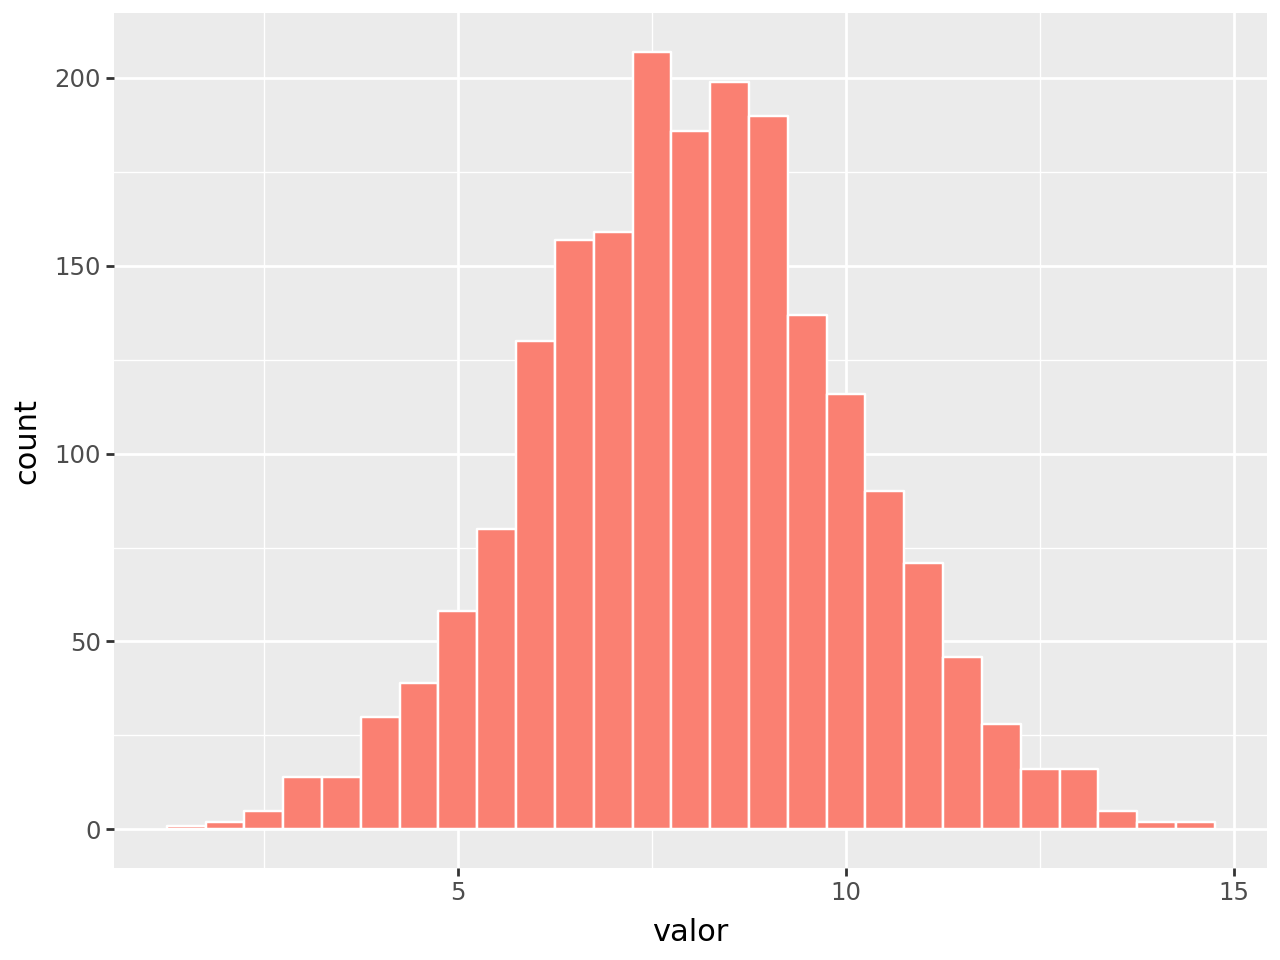

In [21]:
# Creamos el histograma para ver la distribución de los datos
(
    ggplot(data = mi_tabla1) +
    geom_histogram(mapping = aes(x = "valor"),
                   binwidth = 0.5,
                   fill = "salmon",
                   color = "white")
)

In [22]:
# Construimos un modelo
modelo_automatico_2 = distfit(todf = True) # un modelo que convierte los resultados en un dataframe

In [23]:
# Ajustamos el modelo y le damos de comer datos
modelo_automatico_2.fit_transform(observaciones_1)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00233242] [loc=8.037 scale=2.026]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.230289] [loc=1.613 scale=6.424]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.230289] [loc=-536870910.387 scale=536870912.000]
[distfit] >INFO> [dweibull  ] [0.02 sec] [RSS: 0.00385312] [loc=7.983 scale=1.725]
[distfit] >INFO> [t         ] [0.07 sec] [RSS: 0.00232756] [loc=8.037 scale=2.025]
[distfit] >INFO> [genextreme] [0.04 sec] [RSS: 0.0033689] [loc=7.290 scale=2.016]
[distfit] >INFO> [gamma     ] [0.03 sec] [RSS: 0.00229727] [loc=-150.937 scale=0.026]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.002297] [loc=-230.910 scale=238.938]
[distfit] >INFO> [beta      ] [0.03 sec] [RSS: 0.00229522] [loc=-141.647 scale=4033921.222]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.153512] [loc=1.613 scale=13.110]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 0.00242781] [loc=-453.363 scale=66.214]
[distfit]

{'model': {'name': 'beta',
  'score': 0.0022952210109002816,
  'loc': -141.64661604226737,
  'scale': 4033921.221587239,
  'arg': (np.float64(5460.711550012266), np.float64(147158040.33012423)),
  'params': (np.float64(5460.711550012266),
   np.float64(147158040.33012423),
   np.float64(-141.64661604226737),
   np.float64(4033921.221587239)),
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f80672a1090>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': np.float64(4.721697935123615),
  'CII_max_alpha': np.float64(11.38503261203931)},
 'summary':           name     score               loc           scale  \
 0         beta  0.002295       -141.646616  4033921.221587   
 1      lognorm  0.002297       -230.909502      238.938312   
 2        gamma  0.002297       -150.936503        0.025813   
 3            t  0.002328          8.037369        2.024639   
 4         norm  0.002332          8.037396        2.025727   
 5    

In [24]:
# Crea un resumen en una tabla de lo que obtuvo
tabla_resultados_2 = modelo_automatico_2.summary
tabla_resultados_2

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,beta,0.002295,-141.646616,4033921.221587,"(5460.711550012266, 147158040.33012423)","(5460.711550012266, 147158040.33012423, -141.6...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,lognorm,0.002297,-230.909502,238.938312,"(0.008477569449711632,)","(0.008477569449711632, -230.90950194651342, 23...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,gamma,0.002297,-150.936503,0.025813,"(6158.637951199507,)","(6158.637951199507, -150.93650277018438, 0.025...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#377eb8
3,t,0.002328,8.037369,2.024639,"(1879.40003637366,)","(1879.40003637366, 8.037369118174746, 2.024638...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#4daf4a
4,norm,0.002332,8.037396,2.025727,(),"(8.037395972872071, 2.0257265740589725)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#984ea3
5,loggamma,0.002428,-453.363299,66.213999,"(1062.9391429180328,)","(1062.9391429180328, -453.36329886651504, 66.2...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ff7f00
6,genextreme,0.003369,7.290242,2.016101,"(0.2500860970059668,)","(0.2500860970059668, 7.290242081319644, 2.0161...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ffff33
7,dweibull,0.003853,7.98258,1.725412,"(1.2582817395864132,)","(1.2582817395864132, 7.98258025245425, 1.72541...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#a65628
8,uniform,0.153512,1.613459,13.109928,(),"(1.6134589964705137, 13.109927633249967)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#f781bf
9,expon,0.230289,1.613459,6.423937,(),"(1.6134589964705137, 6.423936976401557)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


[distfit] >INFO> Ploting Summary.


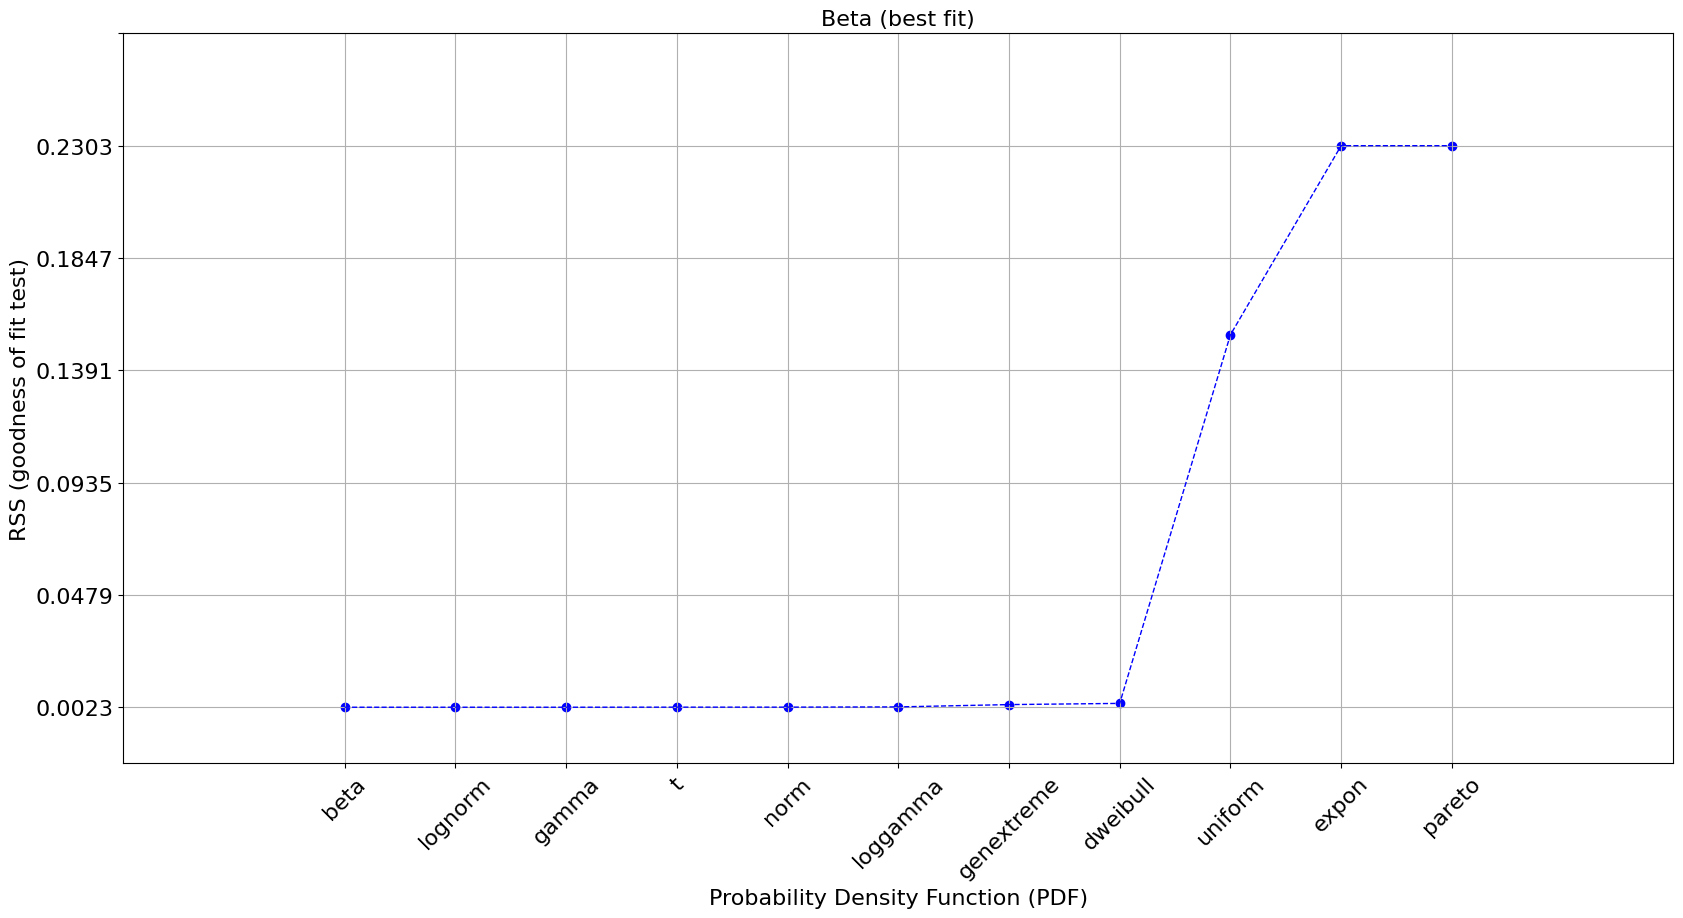

In [25]:
# Se muestra la gráfica con el score para ver qué distribución podemos tomar
modelo_automatico_2.plot_summary()
plt.show()
%matplotlib inline

<font color = 'LightSeaGreen'>
<font size = 3>

- En este ejemplo vemos que Python dice que es una distribución beta. Sin embargo, los datos fueron generados a partir de una gaussiana.
- Observamos que en la columna **params** nos da la **media** y la **desviación** en el caso de la **norm** (7.95, 2.06).
- Recordemos que los datos fueron generados con **media** $= 8$ y **desviación** $= 2$.
- En este caso te fijas en el **score** y como es casi igual al score de la **norm**, por lo que podemos sacrificar las décimas y tomar la gaussiana.
- En la gráfica, bien me podría tomar una t ó una norm, sin problemas, ya que el score es muy parecido. La que tome me va a funcionar bien, con los parámetros que da el .summary.

**Cualquier cosa por debajo de 0.05 te va a funcionar bien**. 

---

<font color = 'DodgerBlue'>
<font size = 5>
    
**Simulaciones**

<font color = 'Black'>
<font size = 3>

Vamos hacer simulaciones para solucionar un problema real.

Dado un conjunto de datos, hacer simulación es extraer información de ese conjunto de datos para poderla *repetir* mediante la computadora y tener una buena aproximación de la realidad.  

<font color = 'LightSeaGreen'>
<font size = 3>

**Ejemplo.**

<font color = 'LightSeaGreen'>
<font size = 3>

**Ganancia diaria promedio de un restaurante**.

Cierto restaurante te ha contratado para estimar las ganancias diarias de su local. El lugar abre de lunes a viernes de 08:00 a 18:00 horas.

Para ello, el administrador sabe que en promedio cada cliente gasta \\$35 con una desviación de \\$5. 

Te permite entrar un día completo a su restaurante para tomar tus datos, y obtienes que hubo 58 llegadas de clientes a lo largo del día, cada una con cierta cantidad de clientes.

Con esa información, calcula la ganancia promedio aproximada durante cada día.

In [26]:
# Datos
llegadas = pd.read_csv("Data/llegadas_restaurante.csv")
platillos = pd.read_csv("Data/platillos.csv")
bebidas = pd.read_csv("Data/bebidas.csv")

In [27]:
# Inspeccionamos los datos
llegadas

,Hora_Llegada,Tamaño_Grupo
0,08:10,2
1,08:21,2
2,08:28,2
3,08:56,2
4,09:04,2
...,...,...
57,16:56,2
58,17:20,2
59,17:40,2
60,17:46,2


In [28]:
# Muestra las columnas de la tabla
llegadas.columns

Index(['Hora_Llegada', 'Tamaño_Grupo'], dtype='object')

In [29]:
# Se muestran las primeras filas 
llegadas.head()

,Hora_Llegada,Tamaño_Grupo
0,08:10,2
1,08:21,2
2,08:28,2
3,08:56,2
4,09:04,2


In [30]:
# Se muestran las primeras 20 filas 
llegadas.head(20)

,Hora_Llegada,Tamaño_Grupo
0,08:10,2
1,08:21,2
2,08:28,2
3,08:56,2
4,09:04,2
5,09:05,2
6,09:07,2
7,09:13,3
8,09:14,2
9,09:27,3


In [31]:
# Observamos el tipo de dato de la columna de la hora llegadas es object, el cual es texto
llegadas["Hora_Llegada"]

0     08:10
1     08:21
2     08:28
3     08:56
4     09:04
      ...  
57    16:56
58    17:20
59    17:40
60    17:46
61    17:53
Name: Hora_Llegada, Length: 62, dtype: object

<font color = 'LightSeaGreen'>
<font size = 3>

Para Python la columna de hora de llegada es texto, no es la hora.

Necesitamos convertir eso a fecha, usando PANDAS, le damos de comer una columna y le decimos como la tiene que interpretar.

In [32]:
# Hacemos un preprocesamiento para trabajar con el tipo de dato correcto
llegadas["Hora_llegada"] = pd.to_datetime(llegadas["Hora_Llegada"], format = '%H:%M')
llegadas["Hora_llegada"] 

0    1900-01-01 08:10:00
1    1900-01-01 08:21:00
2    1900-01-01 08:28:00
3    1900-01-01 08:56:00
4    1900-01-01 09:04:00
             ...        
57   1900-01-01 16:56:00
58   1900-01-01 17:20:00
59   1900-01-01 17:40:00
60   1900-01-01 17:46:00
61   1900-01-01 17:53:00
Name: Hora_llegada, Length: 62, dtype: datetime64[ns]

<font color = 'LightSeaGreen'>
<font size = 3>

Nos aparece ahora si el formato correcto de fecha. 

El inicio de fecha en Python sale el inicio del tiempo en 1900.

In [33]:
# Se muestra la columna con la nueva columna con los datos transformados
llegadas

,Hora_Llegada,Tamaño_Grupo,Hora_llegada
0,08:10,2,1900-01-01 08:10:00
1,08:21,2,1900-01-01 08:21:00
2,08:28,2,1900-01-01 08:28:00
3,08:56,2,1900-01-01 08:56:00
4,09:04,2,1900-01-01 09:04:00
...,...,...,...
57,16:56,2,1900-01-01 16:56:00
58,17:20,2,1900-01-01 17:20:00
59,17:40,2,1900-01-01 17:40:00
60,17:46,2,1900-01-01 17:46:00


<font color = 'LightSeaGreen'>
<font size = 3>

Buscamos entender cada cuánto llegan los clientes. Si somos capaces de replicar la variable aleatoria que mide los tiempos de espera entre clientes.

No hay **variables aleatorias** que te midan la hora, pero hay **variables aleatorias** que te miden el tiempo de espera como la **exponencial**. Es decir, cuál es la probabilidad de que el tiempo de espera sea de tanto.

Buscamos tiempo de espera entre llegadas de clientes.

Este ejercicio busca entender cómo se debe plantear el problema y cómo se puede resolver con las herramientas que tenemos.

Entonces, ahora vamos a obtener el tiempo de espera entre cada llegada de clientes.

**RECORDAR QUE LO PRIMERO QUE HAY QUE HACER ES VER EL HISTOGRAMA PARA HACERTE UNA IDEA DE CÓMO ES LA DISTRIBUCIÓN DE LOS DATOS Y DESPUÉS TOMAR LA ELECCIÓN DE QUÉ TIPO DE DISTRIBUCIÓN DEBE DE SER.**

In [34]:
# Obtenemos el tiempo que pasaron entre cada llegada de cliente, obtiene la diferencia entre cada cliente
llegadas["Hora_llegada"].diff()

0                NaT
1    0 days 00:11:00
2    0 days 00:07:00
3    0 days 00:28:00
4    0 days 00:08:00
           ...      
57   0 days 00:01:00
58   0 days 00:24:00
59   0 days 00:20:00
60   0 days 00:06:00
61   0 days 00:07:00
Name: Hora_llegada, Length: 62, dtype: timedelta64[ns]

In [35]:
# Obtenemos el tiempo que pasaron entre cada llegada de cliente, obtiene la diferencia entre cada cliente
llegadas["Hora_llegada"].diff().dt.total_seconds() # unidades en segundos

0        NaN
1      660.0
2      420.0
3     1680.0
4      480.0
       ...  
57      60.0
58    1440.0
59    1200.0
60     360.0
61     420.0
Name: Hora_llegada, Length: 62, dtype: float64

In [36]:
# Obtenemos el tiempo que pasaron entre cada llegada de cliente, obtiene la diferencia entre cada cliente
llegadas["Hora_llegada"].diff().dt.total_seconds()/60 # unidades en minutos

0      NaN
1     11.0
2      7.0
3     28.0
4      8.0
      ... 
57     1.0
58    24.0
59    20.0
60     6.0
61     7.0
Name: Hora_llegada, Length: 62, dtype: float64

<font color = 'LightSeaGreen'>
<font size = 3>

Ya tenemos los tiempos de espera de clientes.

In [37]:
# Creamos una nueva columna con los tiempos de espera y lo vamos añadir a la tabla original
llegadas["espera"] = llegadas["Hora_llegada"].diff().dt.total_seconds()/60 # unidades en minutos
llegadas

,Hora_Llegada,Tamaño_Grupo,Hora_llegada,espera
0,08:10,2,1900-01-01 08:10:00,NaN
1,08:21,2,1900-01-01 08:21:00,11.0
2,08:28,2,1900-01-01 08:28:00,7.0
3,08:56,2,1900-01-01 08:56:00,28.0
4,09:04,2,1900-01-01 09:04:00,8.0
...,...,...,...,...
57,16:56,2,1900-01-01 16:56:00,1.0
58,17:20,2,1900-01-01 17:20:00,24.0
59,17:40,2,1900-01-01 17:40:00,20.0
60,17:46,2,1900-01-01 17:46:00,6.0


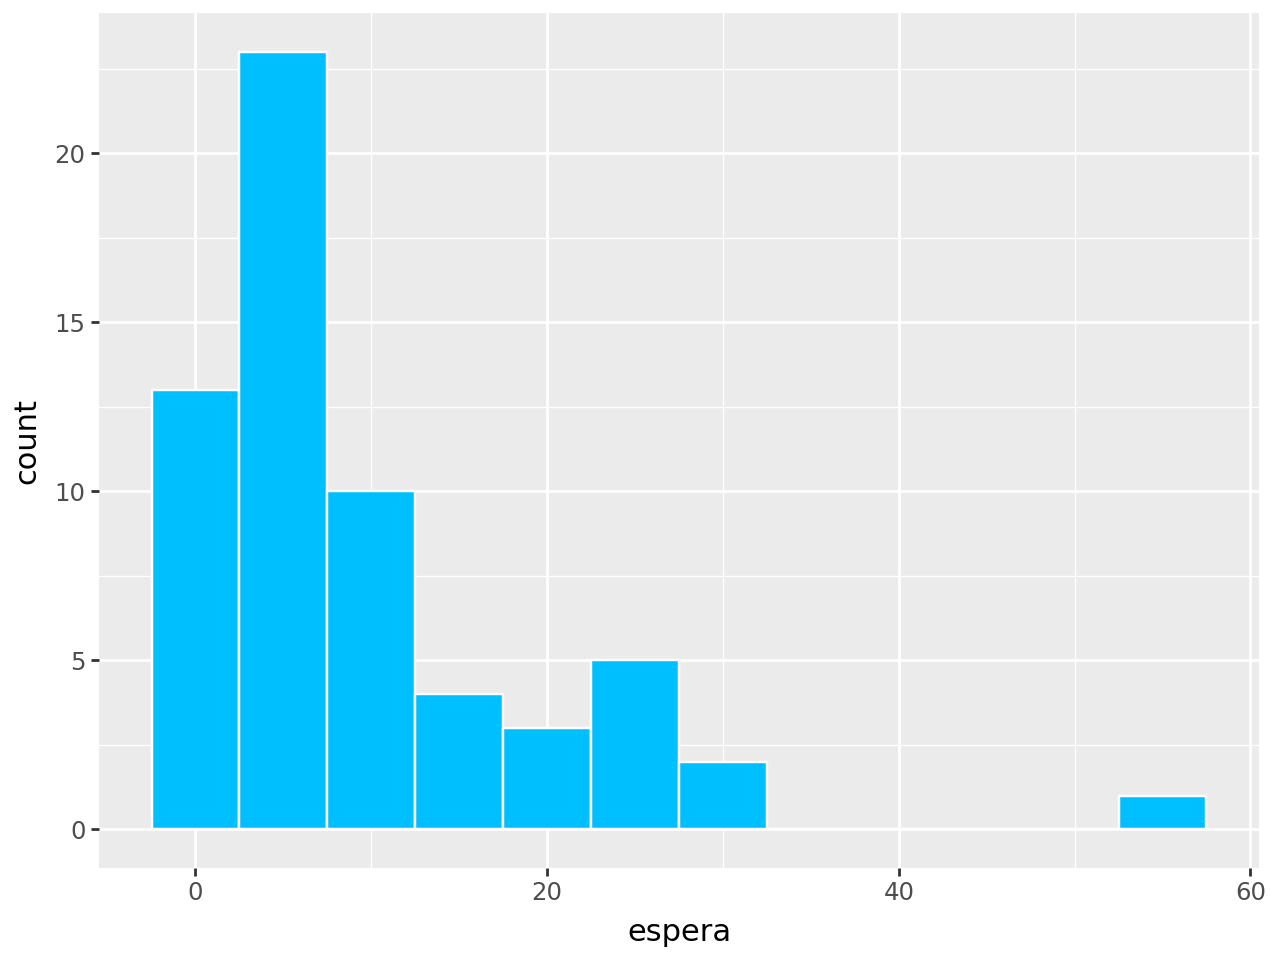

In [38]:
# Distribución de los tiempos de espera entre llegada y llegada 
(
    ggplot(data = llegadas) + geom_histogram(mapping = aes(x = "espera"), 
                                             binwidth = 5,
                                             fill = "deepskyblue",
                                             color = "white")
)

In [39]:
# Como hay un dato faltante o NaN, hay que eliminarlo para poder hacer el fit_transform
t_espera = llegadas["espera"][1:] # toma todos los datos desde el primer row, quita el row 0
t_espera

1     11.0
2      7.0
3     28.0
4      8.0
5      1.0
      ... 
57     1.0
58    24.0
59    20.0
60     6.0
61     7.0
Name: espera, Length: 61, dtype: float64

In [40]:
# Construimos el modelo
mi_modelo_espera = distfit(todf = True)

In [41]:
# Ajustamos el modelo y le pasamos de comer los datos que nos interesan
mi_modelo_espera.fit_transform(t_espera)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00373723] [loc=9.557 scale=9.722]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.000445613] [loc=0.000 scale=9.557]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.000455771] [loc=-557.344 scale=557.344]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 0.00249125] [loc=6.000 scale=6.147]
[distfit] >INFO> [t         ] [0.03 sec] [RSS: 0.00157685] [loc=6.335 scale=4.777]
[distfit] >INFO> [genextreme] [0.03 sec] [RSS: 0.000279533] [loc=4.524 scale=4.632]
[distfit] >INFO> [gamma     ] [0.03 sec] [RSS: 0.00105706] [loc=-0.000 scale=9.814]
[distfit] >INFO> [lognorm   ] [0.02 sec] [RSS: 0.0121663] [loc=-0.000 scale=0.000]
[distfit] >INFO> [beta      ] [0.05 sec] [RSS: 0.000632666] [loc=-0.000 scale=430.856]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.00808918] [loc=0.000 scale=55.000]
[distfit] >INFO> [loggamma  ] [0.03 sec] [RSS: 0.00383806] [loc=-2910.253 scale=398.059]
[distfit] >INFO> [n

{'model': {'name': 'genextreme',
  'score': 0.0002795327699719443,
  'loc': 4.523833266401557,
  'scale': 4.632353625214697,
  'arg': (np.float64(-0.4040735753290542),),
  'params': (np.float64(-0.4040735753290542),
   np.float64(4.523833266401557),
   np.float64(4.632353625214697)),
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f80670a0d90>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': np.float64(0.4183634305846704),
  'CII_max_alpha': np.float64(31.128717998587135)},
 'summary':           name     score          loc       scale  \
 0   genextreme   0.00028     4.523833    4.632354   
 1        expon  0.000446          0.0    9.557377   
 2       pareto  0.000456  -557.344119  557.344119   
 3         beta  0.000633         -0.0     430.856   
 4        gamma  0.001057         -0.0    9.813515   
 5            t  0.001577     6.335375    4.776572   
 6     dweibull  0.002491          6.0    6.146846   
 7        

In [42]:
# Muestra el resumen en una tabla
resultado_tabla_t_espera = mi_modelo_espera.summary
resultado_tabla_t_espera

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,genextreme,0.00028,4.523833,4.632354,"(-0.4040735753290542,)","(-0.4040735753290542, 4.523833266401557, 4.632...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,expon,0.000446,0.0,9.557377,(),"(0.0, 9.557377049180328)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,pareto,0.000456,-557.344119,557.344119,"(59.31555760619902,)","(59.31555760619902, -557.3441193295587, 557.34...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#377eb8
3,beta,0.000633,-0.0,430.856,"(0.8457157581496595, 41.28403791329069)","(0.8457157581496595, 41.28403791329069, -7.264...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#4daf4a
4,gamma,0.001057,-0.0,9.813515,"(0.747300666127164,)","(0.747300666127164, -3.2756891051050284e-20, 9...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#984ea3
5,t,0.001577,6.335375,4.776572,"(1.935468921575933,)","(1.935468921575933, 6.335374918567471, 4.77657...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ff7f00
6,dweibull,0.002491,6.0,6.146846,"(0.8858052759402575,)","(0.8858052759402575, 5.999999999999998, 6.1468...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ffff33
7,norm,0.003737,9.557377,9.721574,(),"(9.557377049180328, 9.721574098683535)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#a65628
8,loggamma,0.003838,-2910.253069,398.059312,"(1533.573348390265,)","(1533.573348390265, -2910.253068695817, 398.05...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#f781bf
9,uniform,0.008089,0.0,55.0,(),"(0.0, 55.0)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


[distfit] >INFO> Ploting Summary.


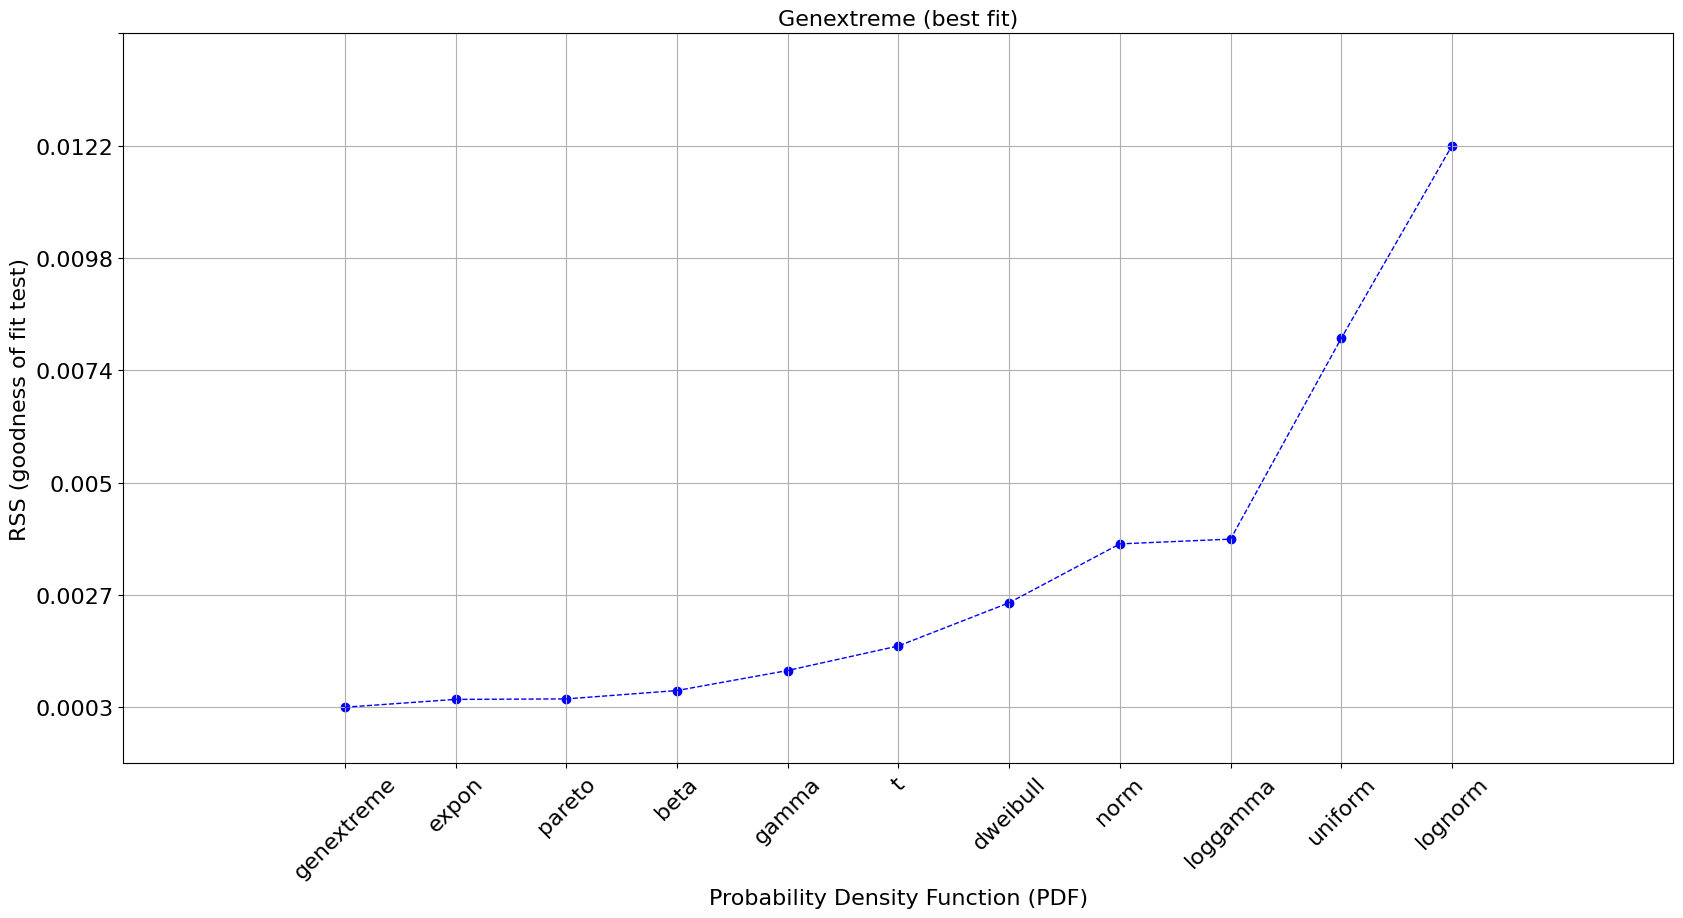

In [43]:
# Se muestra la gráfica con el score para ver qué distribución podemos tomar
mi_modelo_espera.plot_summary()
plt.show()
%matplotlib inline

<font color = 'LightSeaGreen'>
<font size = 3>

Ya tenemos que según Python, la distribución que mejor se ajusta es una **genextreme** pero esa no la conocemos, además que es muy fea. 

El segundo candidato es la **exponencial**, esa si la conocemos mejor y de la columna **params** de la **exponencial** se tienen los siguientes datos (loc, scale): 

$$(0.0, 9.55)$$

El parámetro de loc en las exponenciales es siempre cero.

El scale en la exponencial, en Python, es el tiempo de espera promedio, entre llegada y llegada pasan $\sim 9.55$ min.

Aquí el éxito es que lleguen clientes, entre éxito y éxito, es decir, entre llegada y llegada de grupos de clientes se espera $\sim 9.55$ minutos, es por eso que optamos por una **exponencial** ya que la teoría se ajustó con la realidad.

Entonces los tiempos de espera entre llegadas de clientes es **exponencial** con scale $= 9.55$.

<font color = 'LightSeaGreen'>
<font size = 3>

Veremos cuántos clientes llegan y en qué porcentaje.

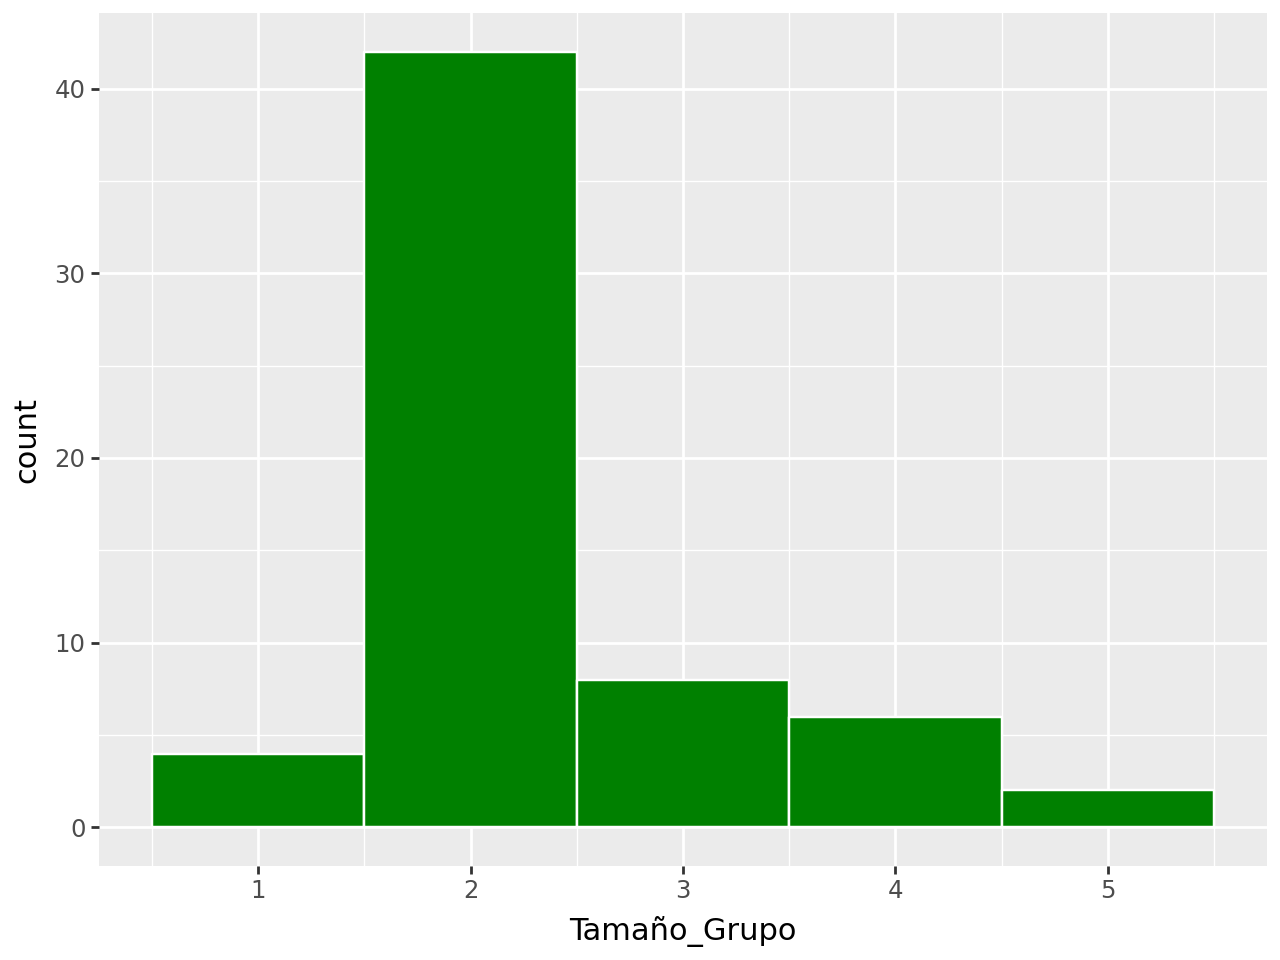

In [44]:
# Creamos el histograma de la distribución de los grupos de clientes (REALES) que llegan, es una variable discreta
(
    ggplot(data = llegadas) + geom_histogram(mapping = aes(x = "Tamaño_Grupo"),
                                             binwidth = 1,
                                             fill = "green",
                                             color = "white")
)

In [45]:
# Obtenemos la tabla de frecuencia absoluta
llegadas["Tamaño_Grupo"].value_counts() # nos dice cuántas veces aparece cada valor

Tamaño_Grupo
2    42
3     8
4     6
1     4
5     2
Name: count, dtype: int64

In [46]:
# Obtenemos la tabla de frecuencia relativa
freq_rel_llegadas = llegadas["Tamaño_Grupo"].value_counts(normalize = True) # normaliza y nos da las frec relativas
freq_rel_llegadas

Tamaño_Grupo
2    0.677419
3    0.129032
4    0.096774
1    0.064516
5    0.032258
Name: proportion, dtype: float64

<font color = 'LightSeaGreen'>
<font size = 3>

Se observa que llegan muchas personas en parejas, pocas personas llegan en solitario o pocos grupos grandes.

<font color = 'LightSeaGreen'>
<font size = 3>

**Vamos hacer una simulación de un día de trabajo**

<font color = 'LightSeaGreen'>
<font size = 3>

Vamos a crear una variable llamada tiempo que incia en 0.

Cada vez que llegue un cliente voy a sumar cuánto tuve que esperar para que llegara ese cliente, siguiendo una exponencial con el scale $= 9.55$. 

En Python, $\lambda = \frac{1}{\text{scale}} = \frac{1}{9.55}$

Ese valor se lo vamos a sumar a tiempo.

En la siguiente imagen se muestra la idea de lo que se busca hacer y con ello hacer el programa en Python.

<img src="Img/programa_simulacion_llegadas_1.jpg">

In [47]:
#Obtenemos el número de grupos que llegaron durante el día

# Creamos una variable llamada tiempo
tiempo = 0 # todavía no abro el restaurante
total_llegadas = 0 # todavía no abro el restaurante, todavía no llega nadie

# Creamos un ciclo while
while tiempo < 600:
    
    # Actualizamos los datos
    total_llegadas = total_llegadas + 1 # cada que llegue un grupo es lo que tenía mas 1
    tiempo = tiempo + np.random.exponential(scale = 9.55) # tiempo actual + más lo que genero con una exponencial

# total_llegadas # devuelve el número de llegadas
print(f'El número total de llegadas es: {total_llegadas}')

El número total de llegadas es: 63


<font color = 'LightSeaGreen'>
<font size = 3>

En la siguiente imagen se describle un poco más el código anterior:

<img src="Img/code_exp.jpg">

Como sabemos que el restaurante está abierto durante 600 minutos al día y como el tiempo de espera es de $\sim 10$ min entre llegadas, uno esperaría que llegaran 60 grupos de clientes al día.

Recordar que:

- Escala $= \frac{1}{\lambda} = 9.55$.
- Varianza $= \frac{1}{\lambda^2}$
- $sd = \frac{1}{\lambda}$

Con eso, se esperaría que al día llegaran $60 \pm 10$ grupos de clientes ($60 \pm \text{desv}$).

La simulación debe seguir la distribución de los datos reales.

In [48]:
# El número de llegadas aproximado durante el día es
600 / 9.55

62.82722513089005

In [49]:
# Calculamos la desviación estándard
1 / 9.55

0.10471204188481674

In [50]:
# Observamos que es el freq_rel.index antes de ejecutar todo el código completo
freq_rel_llegadas.index

Index([2, 3, 4, 1, 5], dtype='int64', name='Tamaño_Grupo')

In [51]:
# Observamos que es el freq_rel_llegadas.values antes de ejecutar todo el código completo
freq_rel_llegadas.values

array([0.67741935, 0.12903226, 0.09677419, 0.06451613, 0.03225806])

<font color = 'LightSeaGreen'>
<font size = 3>

Ahora vamos hacer elecciones usando np.ramdom.choice.

Se muestran algunos ejemplos para comprender lo que hace el código antes de continuar.

In [52]:
# Elegimos una pelota que está etiquetada con un número del 1 al 5
np.random.choice(freq_rel_llegadas.index, 1, p = freq_rel_llegadas.values) # meto la mano y selecciono 1 pelota

array([3])

In [53]:
# Elegimos 59 pelotas que están etiquetadas con un número del 1 al 5
np.random.choice(freq_rel_llegadas.index, 59, p = freq_rel_llegadas.values) # meto la mano y selecciono 59 pelotas

array([2, 2, 3, 1, 4, 2, 4, 2, 2, 2, 2, 3, 2, 2, 1, 3, 2, 2, 2, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 3, 2, 2,
       2, 3, 2, 2, 2, 3, 5, 2, 1, 2, 2, 2, 5, 2, 2])

<font color = 'LightSeaGreen'>
<font size = 3>

En la siguiente imagen se describe el código para comprender su función antes de continuar.

<img src="Img/code_exp2.jpg">

In [54]:
# Hacemos selecciones de grupos ahora usando el valor obtenido de llegadas 
# para saber de qué tamaño es cada grupo
clientes = np.random.choice(freq_rel_llegadas.index, total_llegadas, p = freq_rel_llegadas.values)
clientes

array([2, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 4, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 4, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 3, 3, 3, 4, 2, 1, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2])

In [55]:
# Comprobamos el número de llegadas durante el día que fue obtenido con el while, el # debe ser igual
len(clientes)

63

In [56]:
# Creamos un dataframe de los grupos de clientes usando lo obtenido arriba
df_clientes = pd.DataFrame({"total":clientes})
df_clientes

,total
0,2
1,4
2,2
3,2
4,2
...,...
58,2
59,4
60,2
61,2


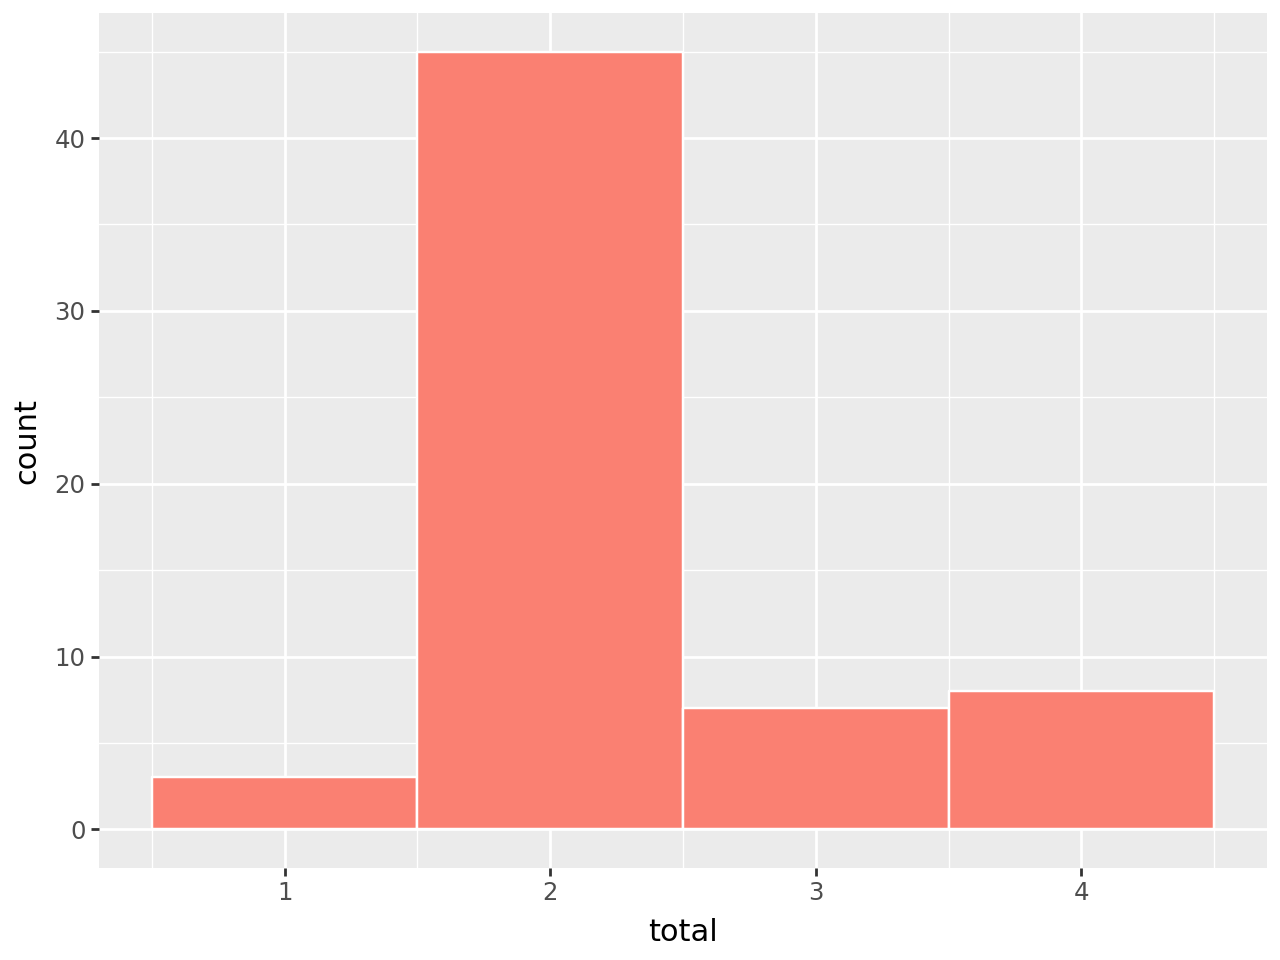

In [57]:
# Creamos el histograma de los datos simulados
(
    ggplot(data = df_clientes) + geom_histogram(mapping = aes(x = "total"),
                                                binwidth = 1,
                                                fill = "salmon",
                                                color = "white"
                                               )
)

<font color = 'LightSeaGreen'>
<font size = 3>

Observamos que la distribución de los datos simulados es muy parecida a la distribución de los datos reales.

<font color = 'LightSeaGreen'>
<font size = 3>

Ya sabemos cuántos grupos de clientes llegaron durante el día.

Ahora hay que simular los pedidos que hicieron cada grupo de clientes.

No nos va interesar qué cosa pidieron sino cuánto vale lo que pidieron ó cuánto van a pagar, es por ello que nos debemos fijar en la columna precio, de la tabla de los platillos.

In [58]:
# Inspeccionamos los datos
platillos

,Platillo,Precio
0,Tacos al Pastor,50
1,Enchiladas Verdes,65
2,Quesadilla de Huitlacoche,70
3,Chilaquiles Rojos,55
4,Pozole Rojo,60


In [59]:
# Muestra las columnas de la tabla
platillos.columns

Index(['Platillo', 'Precio'], dtype='object')

In [60]:
# Se muestran las primeras filas
platillos.head()

,Platillo,Precio
0,Tacos al Pastor,50
1,Enchiladas Verdes,65
2,Quesadilla de Huitlacoche,70
3,Chilaquiles Rojos,55
4,Pozole Rojo,60


In [61]:
# Inspeccionamos los datos
bebidas

,Bebida,Precio
0,Agua de Jamaica,20
1,Horchata,15
2,Refresco,25


In [62]:
# Muestra las columnas de la tabla
bebidas.columns

Index(['Bebida', 'Precio'], dtype='object')

In [63]:
# Se muestran las primeras filas
bebidas.head()

,Bebida,Precio
0,Agua de Jamaica,20
1,Horchata,15
2,Refresco,25


In [64]:
# Ocupo que me selecciones "Precio" de platillos, con el 5 suponemos que se pidieron 5 platillos en una mesa
np.random.choice(platillos["Precio"], 5, replace = True)

array([60, 65, 70, 50, 70])

<font color = 'LightSeaGreen'>
<font size = 3>

En la siguiente imagen se describe el código anterior para comprender su función antes de continuar.

<img src="Img/code_exp3.jpg">

Este código funciona de manera análoga para el ejemplo de las bebidas, el cual se muestra en el siguiente código.

In [65]:
# Ocupo que me selecciones "Precio" de bebidas, con el 5 suponemos que se pidieron 3 bebidas en una mesa
np.random.choice(bebidas["Precio"], 5, replace = True)

array([15, 15, 20, 20, 25])

In [66]:
# Obtenemos la cuenta de platillos de esa mesa
np.random.choice(platillos["Precio"], 5, replace = True).sum()

np.int64(295)

In [67]:
# Obtenemos la cuenta de bebidas de esa mesa
np.random.choice(bebidas["Precio"], 5, replace = True).sum()

np.int64(95)

<font color = 'LightSeaGreen'>
<font size = 3>

Como tenemos la cantidad de grupos de clientes que llegaron, entonces debemos obtener la suma de la cuenta de cada mesa, usando la cantidad de grupos que se obtuvieron.

In [68]:
clientes

array([2, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 4, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 4, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 3, 3, 3, 4, 2, 1, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2])

In [69]:
# Hacemos un ciclo for para comprender el funcionamiento del código de la siguiente celda para obtener la suma de los pedidos de cada mesa
X = [1, 2, 3]
Y = []

for x in X:
    Y.append(x)

Y

[1, 2, 3]

In [70]:
# Creamos una lista vacía de los pagos para guardarlos
pago_clientes = []

# Creamos un ciclo for para que obtenga la suma de las cuentas
for n_cliente in clientes:
    pago_comida = np.random.choice(platillos["Precio"], n_cliente, replace = True).sum()
    pago_bebida = np.random.choice(bebidas["Precio"], n_cliente, replace = True).sum()
    pago_clientes.append(pago_comida + pago_bebida)

# Muestra el total que debe pagar cada grupo
pago_clientes

[np.int64(170),
 np.int64(330),
 np.int64(140),
 np.int64(165),
 np.int64(140),
 np.int64(140),
 np.int64(225),
 np.int64(165),
 np.int64(160),
 np.int64(160),
 np.int64(315),
 np.int64(350),
 np.int64(145),
 np.int64(175),
 np.int64(165),
 np.int64(165),
 np.int64(85),
 np.int64(160),
 np.int64(165),
 np.int64(155),
 np.int64(175),
 np.int64(235),
 np.int64(155),
 np.int64(155),
 np.int64(160),
 np.int64(165),
 np.int64(155),
 np.int64(215),
 np.int64(160),
 np.int64(150),
 np.int64(95),
 np.int64(175),
 np.int64(160),
 np.int64(310),
 np.int64(155),
 np.int64(230),
 np.int64(180),
 np.int64(165),
 np.int64(155),
 np.int64(170),
 np.int64(170),
 np.int64(140),
 np.int64(135),
 np.int64(175),
 np.int64(305),
 np.int64(160),
 np.int64(185),
 np.int64(250),
 np.int64(245),
 np.int64(240),
 np.int64(315),
 np.int64(170),
 np.int64(85),
 np.int64(320),
 np.int64(160),
 np.int64(130),
 np.int64(135),
 np.int64(155),
 np.int64(165),
 np.int64(310),
 np.int64(165),
 np.int64(160),
 np.int64(1

In [71]:
# Mostramos el número de llegadas que hubieron durante el día
print(len(clientes))

# Mostramos el número de pagos que debieron haber hecho, debe coincidir con el número de llegadas
print(len(pago_clientes))

63
63


In [72]:
# Obtenemos la suma de cuánto gané ese día
sum(pago_clientes)

np.int64(11640)

<font color = 'LightSeaGreen'>
<font size = 3>

En resumen, el código que llevamos hasta ahora así quedaría.

- Aquí se obtiene el número de grupos de clientes que llegaron en el día. Es decir, cuántas llegadas hubieron en el día:

```python
#Obtenemos el número de grupos que llegaron durante el día

# Creamos una variable llamada tiempo
tiempo = 0 # todavía no abro el restaurante
total_llegadas = 0 # todavía no abro el restaurante, todavía no llega nadie

# Creamos un ciclo while
while tiempo < 600:
    
    # Actualizamos los datos
    total_llegadas = total_llegadas + 1 # cada que llegue un grupo es lo que tenía mas 1
    tiempo = tiempo + np.random.exponential(scale = 9.55) # tiempo actual + más lo que genero con una exponencial

# total_llegadas # devuelve el número de llegadas
print(f'El número total de llegadas es: {total_llegadas}')
```

- Aquí simulamos de qué tamaño fue cada grupo:

```python
# Hacemos selecciones de grupos ahora usando el valor obtenido de llegadas 
# para saber de qué tamaño es cada grupo
clientes = np.random.choice(freq_rel_llegadas.index, total_llegadas, p = freq_rel_llegadas.values)
clientes

# Comprobamos el número de llegadas durante el día que fue obtenido con el while, el # debe ser igual
len(clientes)
```

- Aquí calculamos cuánto pagó cada grupo:

```python
# Creamos una lista vacía de los pagos para guardarlos
pago_clientes = []

# Creamos un ciclo for para que obtenga la suma de las cuentas
for n_cliente in clientes:
    pago_comida = np.random.choice(platillos["Precio"], n_cliente, replace = True).sum()
    pago_bebida = np.random.choice(bebidas["Precio"], n_cliente, replace = True).sum()
    pago_clientes.append(pago_comida + pago_bebida)

# Muestra el total que debe pagar cada grupo
pago_clientes
```

- Aquí obtenemos cuánto fue la ganancida de todo el día:

```python
# Obtenemos la suma de cuánto gané ese día
sum(pago_clientes)
```

<font color = 'LightSeaGreen'>
<font size = 3>

Con esto, ya podemos simular un día completo de trabajo, porque estamos replicando los tamaños de cada grupo y cuánto pagó cada mesa. 

Lo que nos interesa ahora va ser correr muchas veces ($n$ grande) el código para aplicar el **Teorema del Límite Central**. Es decir, vamos a simular muchas veces los días de trabajo para promediar la ganancia diaria, y eso por el **Teorema del Límite Central** nos va a decir cuánto se gana en promedio al día.

De esta manera se garantiza que el **promedio** es **gaussiano**.

In [73]:
# Creamos una función que replique la simulación de un día de trabajo
def simulacion():

    # Creamos una variable llamada tiempo
    tiempo = 0 # todavía no abro el restaurante
    total_llegadas = 0 # todavía no abro el restaurante, todavía no llega nadie

    # Creamos un ciclo while
    while tiempo < 600:
        # Actualizamos los datos
        total_llegadas = total_llegadas + 1 # cada que llegue un grupo es lo que tenía mas 1
        tiempo = tiempo + np.random.exponential(scale = 9.55) # tiempo actual + más lo que genero con una exponencial

    # Creamos una lista vacía de los pagos para guardarlos
    pago_clientes = []

    # Creamos un ciclo for para que obtenga la suma de las cuentas
    for n_cliente in clientes:
        pago_comida = np.random.choice(platillos["Precio"], n_cliente, replace = True).sum()
        pago_bebida = np.random.choice(bebidas["Precio"], n_cliente, replace = True).sum()
        pago_clientes.append(pago_comida + pago_bebida)


    return sum(pago_clientes)

In [74]:
# Ejecutamos la función
simulacion()

np.int64(11520)

In [75]:
# Ejecutamos la función
simulacion()

np.int64(11665)

In [76]:
# Ejecutamos la función
simulacion()

np.int64(11700)

<font color = 'LightSeaGreen'>
<font size = 3>

Con la función creada en el paso anterior nos damos cuenta que podemos acelerar el proceso de simulación para obtener uno o varios días de trabajo, sin necesidad de ejecutar todo el código completo.

Ahora, queremos simular muchos días de trabajo, para ello vamos a realizar lo siguiente.

In [77]:
# Ejecutamos la función
simulacion()

# Ejecutamos la función 3 veces = 3 días de trabajo
[simulacion() for x in range(3)]

[np.int64(11595), np.int64(11655), np.int64(11785)]

In [78]:
# Creamos una variable de los días simulados
dias_simulados = 3

# Ejecutamos la función los días simulados y obtenemos la suma de esos días de trabajo o lo ganado en esos días
sum([simulacion() for x in range(dias_simulados)])

np.int64(34860)

In [79]:
# Creamos una variable de los días simulados
dias_simulados = 3

# Ejecutamos la función los días simulados y obtenemos el promedio de ganancia diaria
sum([simulacion() for x in range(dias_simulados)]) / dias_simulados

np.float64(11520.0)

In [80]:
# Creamos una variable de los días simulados
dias_simulados = 5

# Ejecutamos la función los días simulados y obtenemos el promedio de ganancia diaria
sum([simulacion() for x in range(dias_simulados)]) / dias_simulados

np.float64(11692.0)

<font color = 'LightSeaGreen'>
<font size = 3>

Para este caso vamos a simular 3000 días de trabajo para que el promedio se estacione.

In [81]:
# Creamos una variable de los días simulados
dias_simulados = 3000

# Ejecutamos la función los días simulados y obtenemos el promedio de ganancia diaria
sum([simulacion() for x in range(dias_simulados)]) / dias_simulados

np.float64(11680.356666666667)

In [82]:
# Creamos una variable de los días simulados
dias_simulados = 3000

# Ejecutamos la función los días simulados y obtenemos el promedio de ganancia diaria
sum([simulacion() for x in range(dias_simulados)]) / dias_simulados

np.float64(11680.126666666667)

In [83]:
# Creamos una variable de los días simulados
dias_simulados = 3000

# Ejecutamos la función los días simulados y obtenemos el promedio de ganancia diaria
sum([simulacion() for x in range(dias_simulados)]) / dias_simulados

np.float64(11679.33)

In [84]:
# Creamos una variable de los días simulados
dias_simulados = 10000

# Ejecutamos la función los días simulados y obtenemos el promedio de ganancia diaria
sum([simulacion() for x in range(dias_simulados)]) / dias_simulados

np.float64(11678.296)

In [85]:
# Creamos una variable de los días simulados
dias_simulados = 50000

# Ejecutamos la función los días simulados y obtenemos el promedio de ganancia diaria
sum([simulacion() for x in range(dias_simulados)]) / dias_simulados

np.float64(11679.565)

<font color = 'Brown'>
<font size = 4>

---
    
**Notas**

<font color = 'DarkRed'>
<font size = 3>

- No existe una **VA.** que te diga horas, minutos, segundos como tal. Ejemplo: Probabilidad de que el bus pase a antes de las 23 hrs. No existe algo que nos de esa información.

- Existen **VA.** que te miden los tiempos transcurridos (tiempos de espera). Por ejemplo: Cuál es la probabilidad de que tenga que esperar el bus 30 minutos?

- Los tiempos de espera son **va. exponenciales**.

- El **scale** $= 9.5573$ min $\Rightarrow$ **scale** $\sim 10$ min, esto nos dice que el tiempo de espera promedio entre grupo y grupo son de aprox. 10 min. Con eso ya tenemos controlado los tiempos de espera.

- **Revisar el Teorema de la Transformación Inversa de probabilidad** en el siguiente [Link](https://www.ddanieltan.com/posts/some2/).

- Usando Excel, podemos generar **exponenciales** usando la siguiente fórmula, gracias al **Teorema de la Transformación Inversa de probabilidad** (se muestra en la siguiente celda):

$$- (\text{scale}) LOG(1 - ALEATORIO()) $$

entonces, con nuestro ejemplo queda de la siguiente manera:

$$- (9.55) LOG(1 - ALEATORIO()) $$

---

<font color = 'Black'>
<font size = 3>

La fórmula que se usó para Excel se deduce del lo siguiente:

$y = F_{X}(x)$

$x = F_{X}^{-1}(y)$

$U \sim U(0,1)$

$Z = F^{-1}(U)$ entonces, cuál es la distribución de $Z$?

$F_{Z}(u) = F_{X}(u)$ y por lo tanto $X$ y $Z$ tienen la misma distribución.

En el caso de la **exponencial** se tiene $F(x) = 1 - e^{- \lambda x}$. Por lo tanto, $F^{- 1}(x) = - \frac{log (1 - x)}{\lambda}$. 

Como $F^{- 1}(U)$ sigue siendo del mismo tipo que $X$, entonces

$$- \frac{log (1 - U)}{\lambda}$$

es una **exponencial**.

Recordar que Python nos devuleve **exponenciales** con **scala**, y $\lambda = \frac{1}{\text{scale}}$.

---